# DNN: analysis with Keras of 2D data

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


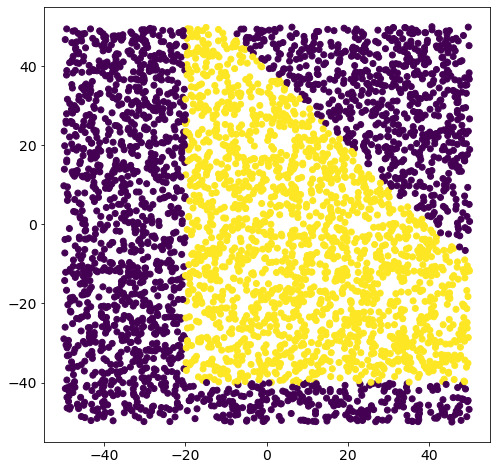

In [ ]:
# Keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

# Split training and test data

In [ ]:
x_train, y_train = x[0:N_train], y[0:N_train]
x_valid, y_valid = x[N_train:], y[N_train:]
print("Train:", len(x_train), "\t Validation:", len(x_valid))

Train: 3200 	 Validation: 800


# Rescale input data

In [ ]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

# Define the model with Keras

In [ ]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE == 1:
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    nepoch = 400

if CASE == 2:
    model = Sequential()
    model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch = 400

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


# Optimization method and cost function

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

# Training

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid, y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6584 - accuracy: 0.5972 - val_loss: 0.6267 - val_accuracy: 0.6900 - 823ms/epoch - 13ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6253 - accuracy: 0.6741 - val_loss: 0.6038 - val_accuracy: 0.6800 - 119ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6019 - accuracy: 0.7009 - val_loss: 0.5716 - val_accuracy: 0.7450 - 128ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5699 - accuracy: 0.7459 - val_loss: 0.5263 - val_accuracy: 0.7800 - 115ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5237 - accuracy: 0.7800 - val_loss: 0.4772 - val_accuracy: 0.8213 - 121ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4687 - accuracy: 0.8181 - val_loss: 0.4230 - val_accuracy: 0.8587 - 101ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4150 - accuracy: 0.8487 - val_loss: 0.3680 - val_accuracy: 0.8813 - 118ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3682 - accuracy: 0.8737 - val_loss: 0.3363 - val_accuracy: 0.9038 - 108ms/epoch - 2ms/step
Epoch 9

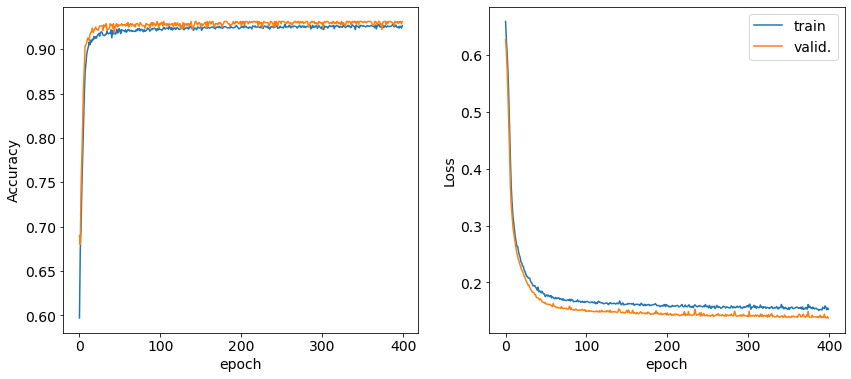

In [ ]:
fig, AX = plt.subplots(1, 2, figsize=(14,6.))
ax = AX[0]
ax.plot(fit.history['accuracy'], label="train")
ax.plot(fit.history['val_accuracy'], label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax = AX[1]
ax.plot(fit.history['loss'], label="train")
ax.plot(fit.history['val_loss'], label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [ ]:
dX = 2
X1 = np.arange(-50, 50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG, 2))
k = 0
for i in range(LG):
    for j in range(LG):
        grid[k,:] = (X1[j], X1[i])
        k = k+1
print(len(X1), len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

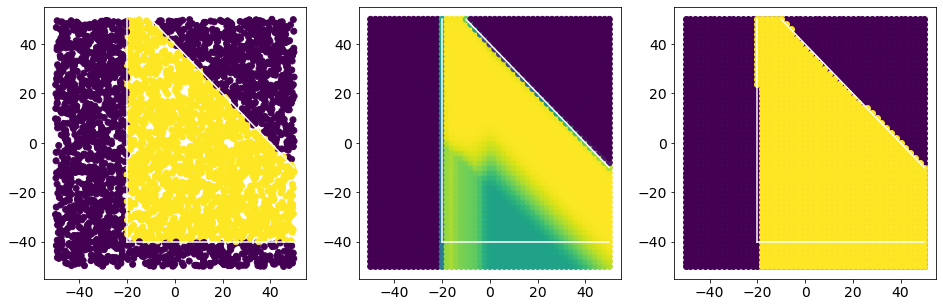

In [ ]:
def boundaries():    
    ax.plot((-20,-20), (-40,50), c="w")
    ax.plot((-20,50), (-40,-40), c="w")
    ax.plot((-10,50), (50,-10), c="w")
fig, AX = plt.subplots(1, 3, figsize=(16,5.))
ax = AX[0]
ax.scatter(x[:,0], x[:,1], c=y)
boundaries()
ax = AX[1]
ax.scatter(grid[:,0], grid[:,1], c=pred)
boundaries()
ax = AX[2]
W1 = np.where(pred > 0.5)[0] 
ax.scatter(grid[:,0], grid[:,1], c="#440154")
ax.scatter(grid[W1,0], grid[W1,1], c="#fde725")
boundaries()
plt.show
plt.show

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=851dd95c-8942-4b5b-8405-817bafccdf36' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>